# 第一类舍选法

舍选法的基本思想是先产生均匀的随机数，然后在密度函数大的地方保留较多的随机数，在密度函数小的地方保留较少的随机数  
使用舍选法对概率密度函数如下的随机变量进行抽样  
$$f(x)=2x, x\in[0,1]$$

In [1]:
import time
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng()

In [2]:
def fx(x):
    return x

N = 0
X = []

#start = time.time()
while N < 10000:
    xi_1, xi_2 = rng.random(2)
    if fx(xi_1) >= xi_2:
        X.append(xi_1)
        N += 1
#print(f"Time: {time.time() - start} s")

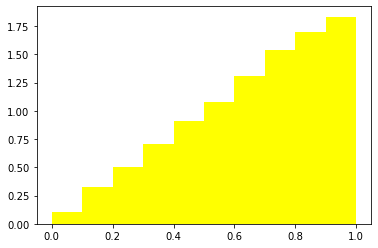

In [3]:
plt.hist(X, bins=10, range=(0.0,1.0), density=True, color='yellow')
plt.show()

在对这个分布使用舍选法进行抽样时，判断是否接受随机数的条件是$\xi_2\leq \xi_1$由于$\xi_1\xi_2$是相互独立的，所以每次产生随机数时都对应了概率相等的两种情况  
$\xi_1=a, \xi_2=b$和$\xi_1=b, \xi_2=a$，两种情况中，必有一种使$\xi_2\leq \xi_1$成立因此，所以可以不必区分$\xi_1\xi_2$，只需要取$\max{(\xi_1,\xi_2)}$为抽样值即可  
这个结论可以推广到高次的情况，对$f(x)=nx^{n-1}, x\in[0,1]$进行抽样时，取$\max{(\xi_1\xi_2\cdots\xi_n)}$为抽样值即可，用这种方法可以避免计算反函数中的开方

# 第二类舍选法

第一类舍选法使用有限区间上的均匀分布，如果需要抽样的密度函数定义域不是有限的，就不能使用第一类舍选法  
对概率密度函数做以下变换  
$$f(x)=L\cdot\frac{f(x)}{Lh(x)}h(x)=Lg(x)h(x)$$  
其中$g(x)=f(x)/(Lh(x))$，引入L的目的是使$g(x)\in[0,1]$，这样就可以让$g(x)$和一个[0,1]范围内的随机变量比大小，第一类舍选法中出现过类似的操作  
同时$h(x)$在积分区间上要归一化，这样就可以将$h(x)$视为概率密度函数，依据其产生随机数，这一点随后也会用到  
假设随机变量$\eta$服从概率密度函数为$f(x)$的分布，那么就有以下关系  
$$p(\eta\leq x)=\int_{-\infty}^{x}f(x)dx=\int_{-\infty}^{x}Lg(x)h(x)dx$$
令$t=H(x)$，其中$H(x)$是$h(x)$的原函数  
$$p\left(\eta\leq H^{-1}(t)\right)=L\int_{0}^{t}g\left(H^{-1}(t)\right)dt$$  
对$t$求导得到概率密度函数  
$$f\left(H^{-1}(t)\right)=Lg\left(H^{-1}(t)\right)$$
如果$t$服从[0,1]范围内的均匀分布，那么$\eta_h=H^{-1}(t)$服从密度函数为$h(x)$的分布，产生一个随机数$\eta_h$，这个随机数被接受的概率正比于$g(\eta_h)$  
因此第二类舍选法的流程为：  
在[0,1]区间上抽取均匀分布的随机数$\xi$，并由$h(x)$抽样得到$\eta_h$  
判断$\xi\leq g(\eta_h)$是否成立，如果不成立则返回上一步  
选取$\eta=\eta_h$作为服从密度函数$f(x)$的一个抽样值

用第二类舍选法产生标准正态分布的抽样值  
由于标准正态分布的对称性，可以只考虑大于0的部分
$$f(x)=\sqrt{\frac{2}{\pi}}\exp{\left(-\frac{x^2}{2}\right)}, x\in(0,+\infty)$$  
令$L=\sqrt{(2e/\pi)}, h(x)=e^{-x}, g(x)=\exp{\left(-(x-1)^2/2\right)}, x\in(0,+\infty)$  
根据直接抽样法得到$\eta_h=-\ln{\xi_1}$，并产生随机数$\xi_2$，判别$\xi_2\leq g(\eta_h)$，即  
$$(\eta_h-1)^2\leq -2\ln{\xi_2}$$

In [4]:
X = []
N = 0
while N < 10000:
    xi_1, xi_2 = rng.random(2)
    eta_h = -np.log(xi_1)
    if (eta_h - 1)**2 <= -2*np.log(xi_2):
        X.append(eta_h)
        N += 1

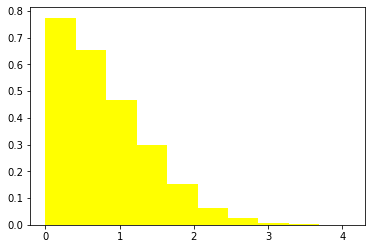

In [5]:
plt.hist(X, color='yellow', density=True)
plt.show()